In [1]:
using BSON
using BSON: @save, @load
using Flux
using Plots

In [2]:
include("src/NN_Extender.jl")

Main.NN_Extender

In [3]:
NN_Extender.main()

///////////////////////////////////////////////////////////////////////////////
                                Extender
///////////////////////////////////////////////////////////////////////////////
    
Neural Network would be changed from:
File: model-iter-09.bson
Activations: ["identity", "relu", "relu", "identity"]
Structure: [11, 30, 20, 20, 1]
Bias: true
Float64: true
To:
Saved to file: water-add-three-g2.bson
Activations: ["identity", "relu", "relu", "identity"]
Structure: [14, 30, 20, 20, 1]
Bias: true
Float64: true
❌ Failed test!
Input model result: 6.296667978717849
Output model result: 6.52920048309314
Difference: 0.23253250437529083
❌ Failed test!
Input model result: -2.1460166834352012
Output model result: -2.2107239102393654
Difference: 0.06470722680416419
❌ Failed test!
Input model result: 15.290731553674327
Output model result: 15.441890514214505
Difference: 0.15115896054017774
❌ Failed test!
Input model result: -8.87425324782734
Output model result: -8.94023948418638

In [4]:
model_file_name_1 = "model-iter-09.bson"
model_file_name_2 = "water-add-three-g2.bson";

In [5]:
model = nothing
BSON.@load model_file_name_1 model

In [6]:
model

Chain(
  Dense(11 => 30),                      # 360 parameters
  Dense(30 => 20, relu),                # 620 parameters
  Dense(20 => 20, relu),                # 420 parameters
  Dense(20 => 1),                       # 21 parameters
)                   # Total: 8 arrays, 1_421 parameters, 11.602 KiB.

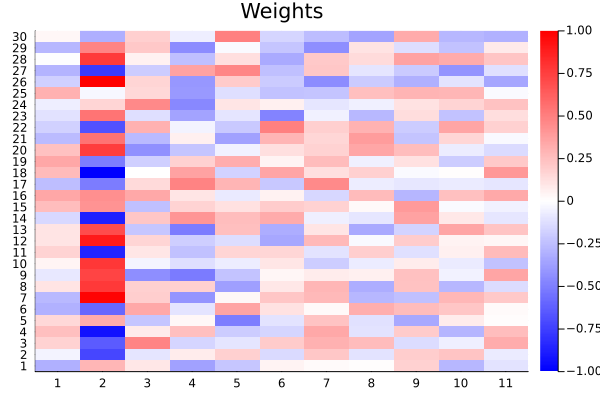

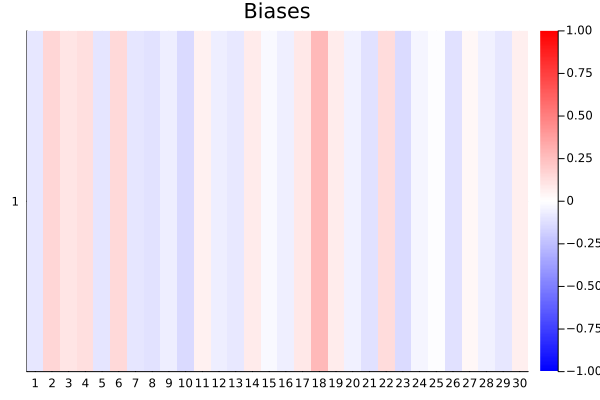

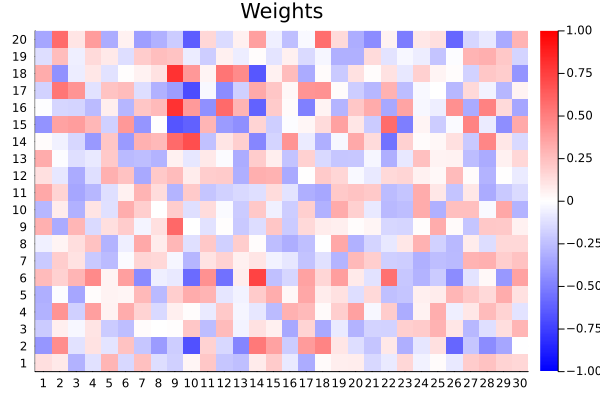

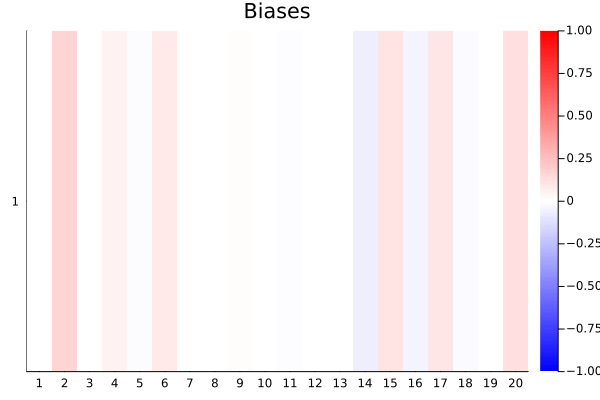

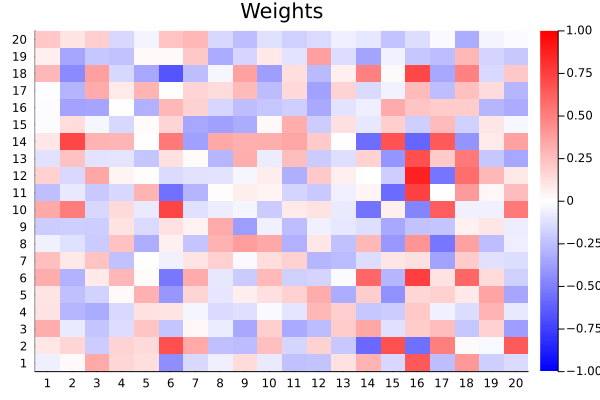

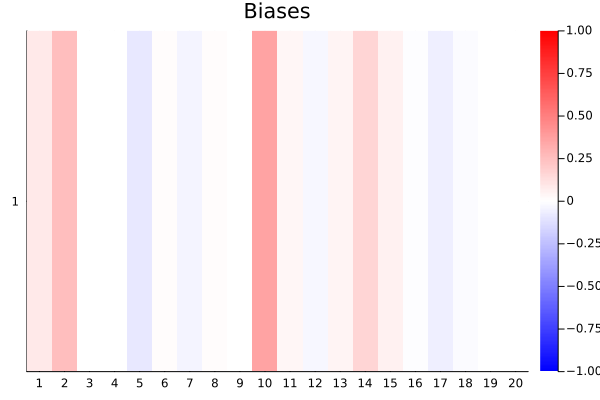

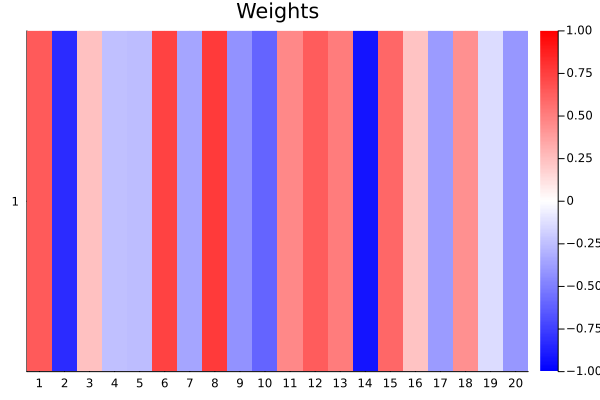

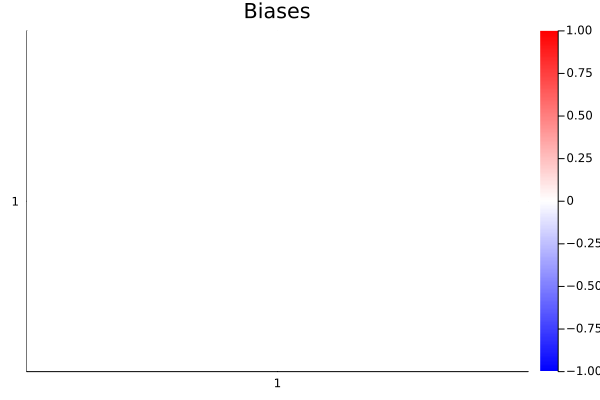

In [7]:
NN_Extender.plot_model_parameters(model)

In [8]:
model = nothing
BSON.@load model_file_name_2 model


In [9]:
model

Chain(
  Dense(14 => 30),                      # 450 parameters
  Dense(30 => 20, relu),                # 620 parameters
  Dense(20 => 20, relu),                # 420 parameters
  Dense(20 => 1),                       # 21 parameters
)                   # Total: 8 arrays, 1_511 parameters, 12.305 KiB.

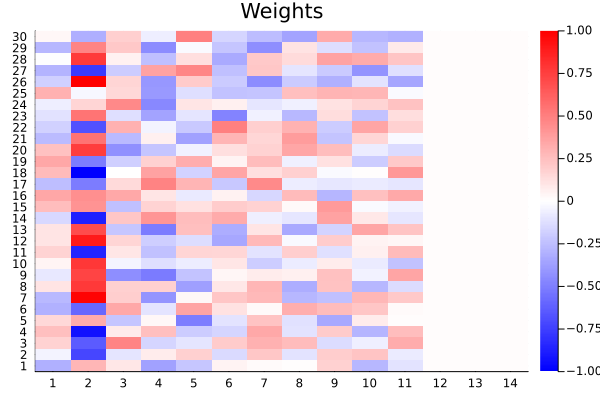

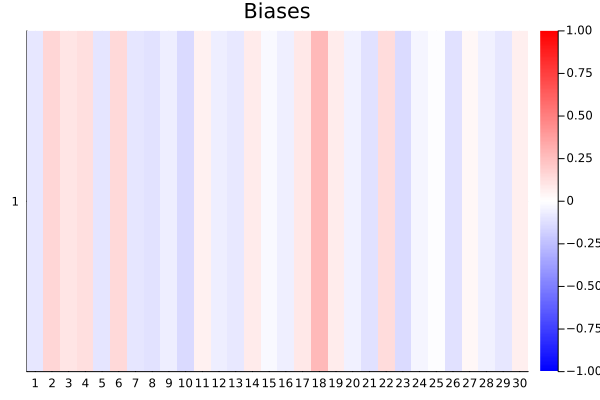

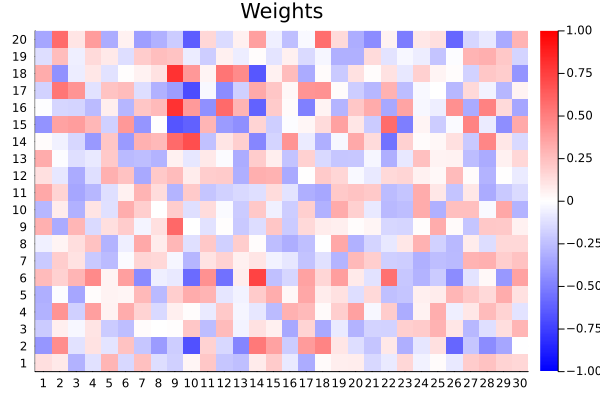

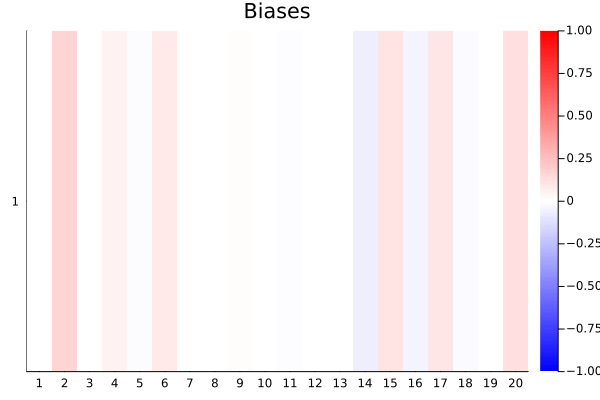

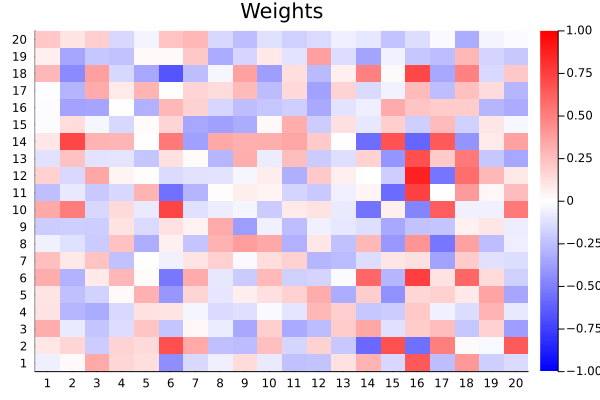

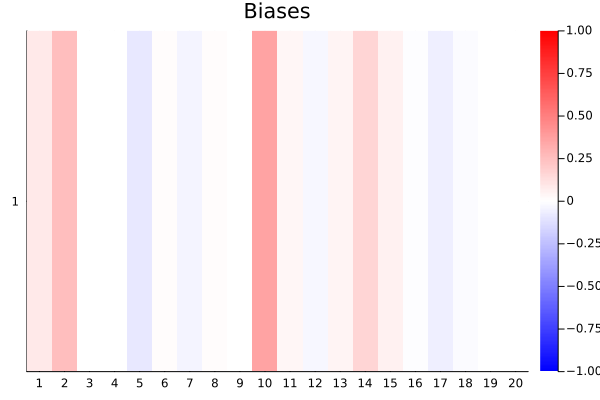

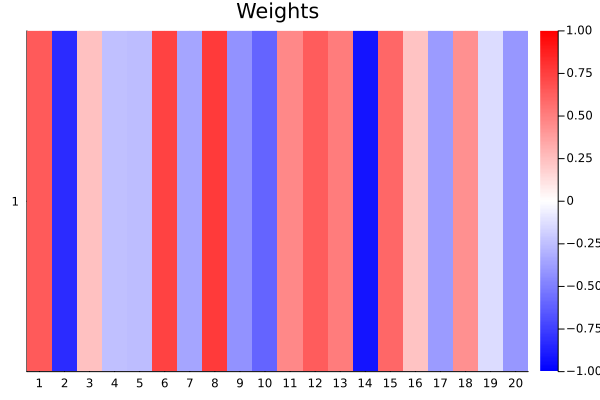

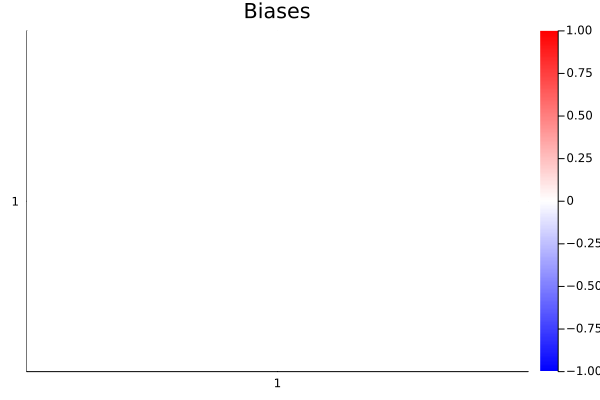

In [10]:
NN_Extender.plot_model_parameters(model)

# Testing

In [11]:
model = nothing
output_model = nothing

BSON.@load model_file_name_2 model
output_model = model
model = nothing
BSON.@load model_file_name_1 model



mul = 1
n1 = size(model.layers[1].weight)[2]
n2 = size(output_model.layers[1].weight)[2]


for i in 1:1000
    input_vector1 = rand(n1) .* mul
    v_2 = rand(n2 - n1) .* mul
    input_vector2 = vcat(input_vector1, v_2)
    result1 = model(input_vector1)
    result2 = output_model(input_vector2)
    if abs(result1[1] - result2[1]) > 0.00000001
        println("❌ Failed test!")
        println("Input model result: $(result1[1])")
        println("Output model result: $(result2[1])")
        println("Difference: $(abs(result1[1] - result2[1]))")
    end
    mul *= -1
end


❌ Failed test!
Input model result: -18.840539674218324
Output model result: -18.784550762254067
Difference: 0.05598891196425626
❌ Failed test!
Input model result: -12.8643341912073
Output model result: -12.94384482003094
Difference: 0.07951062882363935
❌ Failed test!
Input model result: 14.584905403219016
Output model result: 14.737110331556273
Difference: 0.15220492833725707
❌ Failed test!
Input model result: -4.500964351749847
Output model result: -4.554126610121228
Difference: 0.053162258371381554
❌ Failed test!
Input model result: 16.94551323365054
Output model result: 17.119591653089667
Difference: 0.17407841943912672
❌ Failed test!
Input model result: 0.664718413253406
Output model result: 0.6099608352164235
Difference: 0.054757578036982446
❌ Failed test!
Input model result: 14.481021603423356
Output model result: 14.659357131643745
Difference: 0.1783355282203889
❌ Failed test!
Input model result: -12.951033164181005
Output model result: -13.009347746460048
Difference: 0.05831458

In [24]:
# One test
input_vector1 = rand(n1) .* mul
v_2 = rand(n2 - n1) .* mul
input_vector2 = vcat(input_vector1, v_2)
result1 = model(input_vector1)
result2 = output_model(input_vector2)
println("Input model result: $(result1[1])")
println("Output model result: $(result2[1])")

Input model result: -28.517120894645362
Output model result: -28.491331138241804


In [13]:
model

Chain(
  Dense(11 => 30),                      # 360 parameters
  Dense(30 => 20, relu),                # 620 parameters
  Dense(20 => 20, relu),                # 420 parameters
  Dense(20 => 1),                       # 21 parameters
)                   # Total: 8 arrays, 1_421 parameters, 11.602 KiB.

In [14]:
output_model

Chain(
  Dense(14 => 30),                      # 450 parameters
  Dense(30 => 20, relu),                # 620 parameters
  Dense(20 => 20, relu),                # 420 parameters
  Dense(20 => 1),                       # 21 parameters
)                   # Total: 8 arrays, 1_511 parameters, 12.305 KiB.

In [15]:
Flux.params(output_model)[1]

30×14 Matrix{Float64}:
 -0.308994    0.287358    0.0941762  …  -0.111501   0.01  0.01  0.01
 -0.0464172  -0.724593   -0.103253      -0.0766064  0.01  0.01  0.01
  0.177263   -0.644989    0.481293       0.32387    0.01  0.01  0.01
  0.251849   -0.932901    0.0808111      0.257294   0.01  0.01  0.01
  0.152343    0.325412   -0.226646       0.0129307  0.01  0.01  0.01
 -0.304903   -0.596605    0.340929   …   0.0195045  0.01  0.01  0.01
 -0.27311     0.989563    0.191826       0.21125    0.01  0.01  0.01
  0.104771    0.778009    0.183015      -0.138597   0.01  0.01  0.01
 -0.0920828   0.734984   -0.443404       0.351811   0.01  0.01  0.01
  0.0426653   0.784475   -0.0445688     -0.240149   0.01  0.01  0.01
  ⋮                                  ⋱   ⋮                      
 -0.180213   -0.682642    0.305973       0.180461   0.01  0.01  0.01
 -0.114106    0.546353   -0.123825       0.130969   0.01  0.01  0.01
 -0.0652578   0.165474    0.464227       0.239063   0.01  0.01  0.01
  0.306435   -0